Actividad Semanal -- 9

Genaro Rodriguez Vazquez A01150931

Javier Rodríguez Rudas A01793817

Ciencia y analítica de Datos

Profesor: Dr. Jobish Vallikavungal Devassia  

14 Noviembre 2022






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplcursors import cursor 
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#For pipeline creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

#For scoring RMSE, MAE y MAPE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import cross_validate 
from sklearn.metrics import mean_absolute_percentage_error

#Gridsearch and importance
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import power_transform
from sklearn.impute import SimpleImputer
import math as math


from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import metrics
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score
import seaborn as sns
from matplotlib import rcParams

import geopandas as gpd
from  geopandas import GeoDataFrame
from shapely.geometry import Point

scaler = StandardScaler()
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

In [2]:
#df contiene nuestro dataframe original
df = pd.read_csv('Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', 
                    index_col=None ,encoding='utf-8',encoding_errors='ignore')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [3]:
df.describe(include='all')

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068,1068,1068.000000,1068.000000,1068.0,1064.000000,1064,1062.000000,1062,0.0,1066,1066,1066,1068,1068,1067,1067,1068,1068,1067,1067,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,634,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,1068,1066,13,32,452,273,8,NaN,NaN,NaN,NaN,4,NaN,5,NaN,925,5,4,862,4,889,4,125,5,995,3,209,3,3,2,168,2,61,2,31,2,362,3,615,2,3,126,3,3,3,3,2,3,2,3,2,2,2,2,2,2,2
top,DLAGU6,EL FUERTE,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,NaN,NaN,NaN,NaN,Alta,NaN,Permisible para riego,NaN,496,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Dura,<1.1,Potable - Excelente,<0.02,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,1,2,232,121,27,119,1039,NaN,NaN,NaN,NaN,794,NaN,460,NaN,4,491,834,162,434,26,577,737,739,65,788,815,816,1066,1066,854,1053,968,1067,1038,1056,545,982,401,932,434,78,1005,939,995,995,876,841,1007,985,941,1066,1053,1067,1056,982,932
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.891007,23.163618,2020.0,235.633759,NaN,1138.953013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.703263,3.887670,0.0,116.874291,NaN,1245.563674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-116.664250,14.561150,2020.0,26.640000,NaN,50.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-105.388865,20.212055,2020.0,164.000000,NaN,501.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-102.174180,22.617190,2020.0,215.527500,NaN,815.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-98.974716,25.510285,2020.0,292.710000,NaN,1322.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    Separando training-validation and test datasets. 
    Removiendo variables con valores unicas asi como estaticas, columnas vacias, etc.
    Se separa variable de salida.

In [4]:
y = df[['CALIDAD_MN']]
X = df.drop(columns=['CLAVE', 'PERIODO', 'SITIO','SDT_mg/L',])

#Replacing all the "<" chars from all the columns, to make possible the numeric imputation
X.replace('\<', '', regex=True, inplace=True)

Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=.15, random_state=0)

    Creamos el pipeline para normalizar, e imputar datos faltantes

In [5]:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(missing_values=np.nan, strategy= 'mean', fill_value = 0)),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L',
'FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']



#catImp_pipeline =  Pipeline(steps= [('si2', SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=np.nan))])
#catImp_pipeline_nombres = list(X.drop(columns=['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L',
#'FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
#'MUNICIPIO','ACUIFERO','CONTAMINANTES']))


catOHE_pipeline =  Pipeline(steps= [('OneHotEncoder', OneHotEncoder(handle_unknown = 'ignore')),
                                    ('si2', SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=np.nan))])      

catOHE_pipeline_nombres = list(X.drop(columns=['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L',
'FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
'MUNICIPIO','ACUIFERO','CONTAMINANTES']))                                                            

catOHE_pipeline_nombres                                                                                                                   

['ORGANISMO_DE_CUENCA',
 'ESTADO',
 'SUBTIPO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO',
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE',
 'SEMAFORO',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE']

In [6]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names


In [7]:
preprocessor = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        #('catimp', catImp_pipeline, catImp_pipeline_nombres)
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)
                                        ], remainder='passthrough')


XtrainvalTransf = preprocessor.fit_transform(Xtv)

#optional
XtrainvalTransf_asDataFrame = pd.DataFrame(XtrainvalTransf)


XtrainvalTransf_asDataFrame.columns = get_feature_names(preprocessor)[:len(get_feature_names(preprocessor))-3] + ['MUNICIPIO','ACUIFERO','CONTAMINANTES']

XtrainvalTransf_asDataFrame.head(3)
#df.query('2 == "MANANTIAL EL TESORERO"')

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,OneHotEncoder__x0_AGUAS DEL VALLE DE MEXICO,OneHotEncoder__x0_BALSAS,OneHotEncoder__x0_CUENCAS CENTRALES DEL NORTE,OneHotEncoder__x0_FRONTERA SUR,OneHotEncoder__x0_GOLFO CENTRO,OneHotEncoder__x0_GOLFO NORTE,OneHotEncoder__x0_LERMA SANTIAGO PACIFICO,OneHotEncoder__x0_NOROESTE,OneHotEncoder__x0_PACIFICO NORTE,OneHotEncoder__x0_PACIFICO SUR,OneHotEncoder__x0_PENINSULA DE BAJA CALIFORNIA,OneHotEncoder__x0_PENINSULA DE YUCATAN,OneHotEncoder__x0_RIO BRAVO,OneHotEncoder__x1_AGUASCALIENTES,OneHotEncoder__x1_BAJA CALIFORNIA,OneHotEncoder__x1_BAJA CALIFORNIA SUR,OneHotEncoder__x1_CAMPECHE,OneHotEncoder__x1_CHIAPAS,OneHotEncoder__x1_CHIHUAHUA,OneHotEncoder__x1_COAHUILA DE ZARAGOZA,OneHotEncoder__x1_COLIMA,OneHotEncoder__x1_DISTRITO FEDERAL,OneHotEncoder__x1_DURANGO,OneHotEncoder__x1_GUANAJUATO,OneHotEncoder__x1_GUERRERO,OneHotEncoder__x1_HIDALGO,OneHotEncoder__x1_JALISCO,OneHotEncoder__x1_MEXICO,OneHotEncoder__x1_MICHOACAN DE OCAMPO,OneHotEncoder__x1_MORELOS,OneHotEncoder__x1_NAYARIT,OneHotEncoder__x1_NUEVO LEON,OneHotEncoder__x1_OAXACA,OneHotEncoder__x1_PUEBLA,OneHotEncoder__x1_QUERETARO ARTEAGA,OneHotEncoder__x1_QUINTANA ROO,OneHotEncoder__x1_SAN LUIS POTOSI,OneHotEncoder__x1_SINALOA,OneHotEncoder__x1_SONORA,OneHotEncoder__x1_TABASCO,OneHotEncoder__x1_TAMAULIPAS,OneHotEncoder__x1_TLAXCALA,OneHotEncoder__x1_VERACRUZ DE IGNACIO DE LA LLAVE,OneHotEncoder__x1_YUCATAN,OneHotEncoder__x1_ZACATECAS,OneHotEncoder__x2_BOMBEO CENOTE,OneHotEncoder__x2_CENOTE,OneHotEncoder__x2_DESCARGA,OneHotEncoder__x2_MANANTIAL,OneHotEncoder__x2_NORIA,OneHotEncoder__x2_POZO,OneHotEncoder__x2_POZO NORIA,OneHotEncoder__x2_Pozo,OneHotEncoder__x3_Alta,OneHotEncoder__x3_Baja,OneHotEncoder__x3_Indeseable como FAAP,OneHotEncoder__x3_Media,OneHotEncoder__x3_nan,OneHotEncoder__x4_Buena para riego,OneHotEncoder__x4_Dudosa para riego,OneHotEncoder__x4_Excelente para riego,OneHotEncoder__x4_Indeseable para riego,OneHotEncoder__x4_Permisible para riego,OneHotEncoder__x4_nan,OneHotEncoder__x5_Cultivos con manejo especial,OneHotEncoder__x5_Cultivos sensibles,OneHotEncoder__x5_Cultivos tolerantes,OneHotEncoder__x5_Excelente para riego,OneHotEncoder__x5_Indeseable para riego,OneHotEncoder__x5_nan,OneHotEncoder__x6_Ligeramente salobres,OneHotEncoder__x6_Potable - Dulce,OneHotEncoder__x6_Salinas,OneHotEncoder__x6_Salobres,OneHotEncoder__x6_nan,OneHotEncoder__x7_Alta,OneHotEncoder__x7_Baja,OneHotEncoder__x7_Media,OneHotEncoder__x7_Potable - Optima,OneHotEncoder__x8_Muy dura e indeseable usos industrial y domestico,OneHotEncoder__x8_Potable - Dura,OneHotEncoder__x8_Potable - Moderadamente suave,OneHotEncoder__x8_Potable - Suave,OneHotEncoder__x8_nan,OneHotEncoder__x9_Aceptable,OneHotEncoder__x9_Buena calidad,OneHotEncoder__x9_Contaminada,OneHotEncoder__x9_Fuertemente contaminada,OneHotEncoder__x9_Potable - Excelente,OneHotEncoder__x10_No apta como FAAP,OneHotEncoder__x10_Potable - Buena calidad,OneHotEncoder__x10_Potable - Excelente,OneHotEncoder__x10_nan,OneHotEncoder__x11_Apta como FAAP,OneHotEncoder__x11_No apta como FAAP,OneHotEncoder__x11_Potable - Excelente,OneHotEncoder__x12_No apta como FAAP,OneHotEncoder__x12_Potable - Excelente,OneHotEncoder__x13_No apta como FAAP,OneHotEncoder__x13_Potable - Excelente,OneHotEncoder__x14_No apta como FAAP,OneHotEncoder__x14_Potable - Excelente,OneHotEncoder__x15_No apta como FAAP,OneHotEncoder__x15_Potable - Excelente,OneHotEncoder__x16_Potable - Excelente,OneHotEncoder__x16_Puede afectar la salud,OneHotEncoder__x16_Sin efectos en la salud - Puede dar color al agua,OneHotEncoder__x17_Potable - Excelente,OneHotEncoder__x17_Sin efectos en la salud - Puede dar color al agua,OneHotEncoder__x18_Amarillo,OneHotEncoder__x18_Rojo,OneHotEncoder__x18_Verde,OneHotEncoder__x19_ND,OneHotEncoder__x19_NO,OneHotEncoder__x19_SI,OneHotEncoder__x20_ND,OneHotEncoder__x20_N

    Veamos como se ve el mismo renglon, antes y despues de nuestro pipeline de transformacion, observar la columna "CALIDAD_ALC" como cambia de ser  NaN a "ALTA" (most_frequent). Ademas, observamos como todos los valores cuantitativos han sido escalados al valor minimo y maximo de todos ellos dentro del dataset.

In [8]:
df.query('ACUIFERO == "VALLE SANTIAGO-SAN BLAS"')

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
407,DLNAY1895,"MANANTIAL ""EL TESORERO""",PACIFICO NORTE,NAYARIT,SANTIAGO IXCUINTLA,VALLE SANTIAGO-SAN BLAS,POZO,-105.08064,21.8476,2020,NaN,NaN,50.4,Excelente para riego,NaN,<25,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Suave,31,Buena calidad,0.124414,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.0152,Potable - Excelente,0.2206,Potable - Excelente,Verde,NaN,ND,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [9]:
XtrainvalTransf_asDataFrame.query('ACUIFERO == "VALLE SANTIAGO-SAN BLAS"')

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,OneHotEncoder__x0_AGUAS DEL VALLE DE MEXICO,OneHotEncoder__x0_BALSAS,OneHotEncoder__x0_CUENCAS CENTRALES DEL NORTE,OneHotEncoder__x0_FRONTERA SUR,OneHotEncoder__x0_GOLFO CENTRO,OneHotEncoder__x0_GOLFO NORTE,OneHotEncoder__x0_LERMA SANTIAGO PACIFICO,OneHotEncoder__x0_NOROESTE,OneHotEncoder__x0_PACIFICO NORTE,OneHotEncoder__x0_PACIFICO SUR,OneHotEncoder__x0_PENINSULA DE BAJA CALIFORNIA,OneHotEncoder__x0_PENINSULA DE YUCATAN,OneHotEncoder__x0_RIO BRAVO,OneHotEncoder__x1_AGUASCALIENTES,OneHotEncoder__x1_BAJA CALIFORNIA,OneHotEncoder__x1_BAJA CALIFORNIA SUR,OneHotEncoder__x1_CAMPECHE,OneHotEncoder__x1_CHIAPAS,OneHotEncoder__x1_CHIHUAHUA,OneHotEncoder__x1_COAHUILA DE ZARAGOZA,OneHotEncoder__x1_COLIMA,OneHotEncoder__x1_DISTRITO FEDERAL,OneHotEncoder__x1_DURANGO,OneHotEncoder__x1_GUANAJUATO,OneHotEncoder__x1_GUERRERO,OneHotEncoder__x1_HIDALGO,OneHotEncoder__x1_JALISCO,OneHotEncoder__x1_MEXICO,OneHotEncoder__x1_MICHOACAN DE OCAMPO,OneHotEncoder__x1_MORELOS,OneHotEncoder__x1_NAYARIT,OneHotEncoder__x1_NUEVO LEON,OneHotEncoder__x1_OAXACA,OneHotEncoder__x1_PUEBLA,OneHotEncoder__x1_QUERETARO ARTEAGA,OneHotEncoder__x1_QUINTANA ROO,OneHotEncoder__x1_SAN LUIS POTOSI,OneHotEncoder__x1_SINALOA,OneHotEncoder__x1_SONORA,OneHotEncoder__x1_TABASCO,OneHotEncoder__x1_TAMAULIPAS,OneHotEncoder__x1_TLAXCALA,OneHotEncoder__x1_VERACRUZ DE IGNACIO DE LA LLAVE,OneHotEncoder__x1_YUCATAN,OneHotEncoder__x1_ZACATECAS,OneHotEncoder__x2_BOMBEO CENOTE,OneHotEncoder__x2_CENOTE,OneHotEncoder__x2_DESCARGA,OneHotEncoder__x2_MANANTIAL,OneHotEncoder__x2_NORIA,OneHotEncoder__x2_POZO,OneHotEncoder__x2_POZO NORIA,OneHotEncoder__x2_Pozo,OneHotEncoder__x3_Alta,OneHotEncoder__x3_Baja,OneHotEncoder__x3_Indeseable como FAAP,OneHotEncoder__x3_Media,OneHotEncoder__x3_nan,OneHotEncoder__x4_Buena para riego,OneHotEncoder__x4_Dudosa para riego,OneHotEncoder__x4_Excelente para riego,OneHotEncoder__x4_Indeseable para riego,OneHotEncoder__x4_Permisible para riego,OneHotEncoder__x4_nan,OneHotEncoder__x5_Cultivos con manejo especial,OneHotEncoder__x5_Cultivos sensibles,OneHotEncoder__x5_Cultivos tolerantes,OneHotEncoder__x5_Excelente para riego,OneHotEncoder__x5_Indeseable para riego,OneHotEncoder__x5_nan,OneHotEncoder__x6_Ligeramente salobres,OneHotEncoder__x6_Potable - Dulce,OneHotEncoder__x6_Salinas,OneHotEncoder__x6_Salobres,OneHotEncoder__x6_nan,OneHotEncoder__x7_Alta,OneHotEncoder__x7_Baja,OneHotEncoder__x7_Media,OneHotEncoder__x7_Potable - Optima,OneHotEncoder__x8_Muy dura e indeseable usos industrial y domestico,OneHotEncoder__x8_Potable - Dura,OneHotEncoder__x8_Potable - Moderadamente suave,OneHotEncoder__x8_Potable - Suave,OneHotEncoder__x8_nan,OneHotEncoder__x9_Aceptable,OneHotEncoder__x9_Buena calidad,OneHotEncoder__x9_Contaminada,OneHotEncoder__x9_Fuertemente contaminada,OneHotEncoder__x9_Potable - Excelente,OneHotEncoder__x10_No apta como FAAP,OneHotEncoder__x10_Potable - Buena calidad,OneHotEncoder__x10_Potable - Excelente,OneHotEncoder__x10_nan,OneHotEncoder__x11_Apta como FAAP,OneHotEncoder__x11_No apta como FAAP,OneHotEncoder__x11_Potable - Excelente,OneHotEncoder__x12_No apta como FAAP,OneHotEncoder__x12_Potable - Excelente,OneHotEncoder__x13_No apta como FAAP,OneHotEncoder__x13_Potable - Excelente,OneHotEncoder__x14_No apta como FAAP,OneHotEncoder__x14_Potable - Excelente,OneHotEncoder__x15_No apta como FAAP,OneHotEncoder__x15_Potable - Excelente,OneHotEncoder__x16_Potable - Excelente,OneHotEncoder__x16_Puede afectar la salud,OneHotEncoder__x16_Sin efectos en la salud - Puede dar color al agua,OneHotEncoder__x17_Potable - Excelente,OneHotEncoder__x17_Sin efectos en la salud - Puede dar color al agua,OneHotEncoder__x18_Amarillo,OneHotEncoder__x18_Rojo,OneHotEncoder__x18_Verde,OneHotEncoder__x19_ND,OneHotEncoder__x19_NO,OneHotEncoder__x19_SI,OneHotEncoder__x20_ND,OneHotEncoder__x20_N

    El siguiente pareto de histogramas de datos cateogoricos, nos ayudara a saber si podemos agrupar algunos de ellos, esto con el fin de reducir la cantidad de variables de entrada de nuestro modelo. Aqui observamos que SITIO, MUNICIPIO y ACUIFERO tienen datos unicos, es decir son irrelevantes para el modelo (pues tienen alta variabilidad)

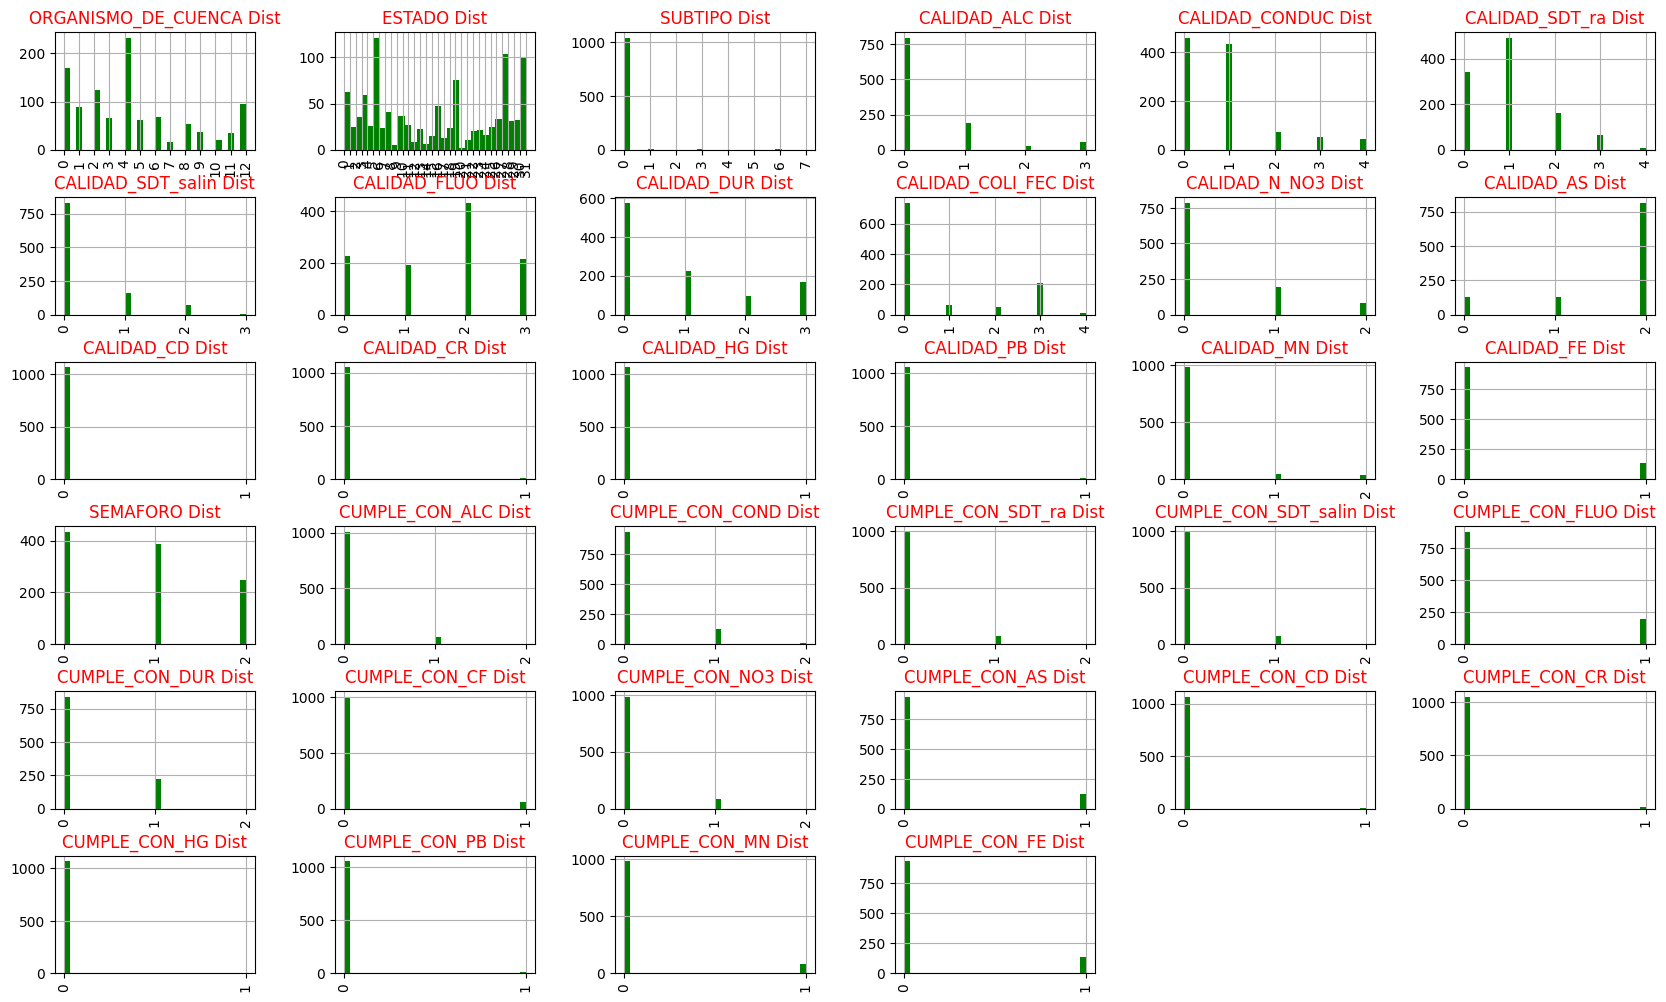

In [10]:
# Checking categorical variables distribution
fig=plt.figure(figsize=(20,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i, feature in enumerate(catOHE_pipeline_nombres):
    ax=fig.add_subplot(10,6,i+1)
    X[feature].hist(bins=30,ax=ax,facecolor='green')
    ax.set_title(feature+" Dist",color='red')
    #ax.set_xticklabels(ax.get_xticks(), rotation = 90)
    ax.set_xticklabels(ax.get_xticks(), rotation=90)

fig.tight_layout(pad=50.0)  
plt.show();

In [11]:
XtrainvalTransf_asDataFrame.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,OneHotEncoder__x0_AGUAS DEL VALLE DE MEXICO,OneHotEncoder__x0_BALSAS,OneHotEncoder__x0_CUENCAS CENTRALES DEL NORTE,OneHotEncoder__x0_FRONTERA SUR,OneHotEncoder__x0_GOLFO CENTRO,OneHotEncoder__x0_GOLFO NORTE,OneHotEncoder__x0_LERMA SANTIAGO PACIFICO,OneHotEncoder__x0_NOROESTE,OneHotEncoder__x0_PACIFICO NORTE,OneHotEncoder__x0_PACIFICO SUR,OneHotEncoder__x0_PENINSULA DE BAJA CALIFORNIA,OneHotEncoder__x0_PENINSULA DE YUCATAN,OneHotEncoder__x0_RIO BRAVO,OneHotEncoder__x1_AGUASCALIENTES,OneHotEncoder__x1_BAJA CALIFORNIA,OneHotEncoder__x1_BAJA CALIFORNIA SUR,OneHotEncoder__x1_CAMPECHE,OneHotEncoder__x1_CHIAPAS,OneHotEncoder__x1_CHIHUAHUA,OneHotEncoder__x1_COAHUILA DE ZARAGOZA,OneHotEncoder__x1_COLIMA,OneHotEncoder__x1_DISTRITO FEDERAL,OneHotEncoder__x1_DURANGO,OneHotEncoder__x1_GUANAJUATO,OneHotEncoder__x1_GUERRERO,OneHotEncoder__x1_HIDALGO,OneHotEncoder__x1_JALISCO,OneHotEncoder__x1_MEXICO,OneHotEncoder__x1_MICHOACAN DE OCAMPO,OneHotEncoder__x1_MORELOS,OneHotEncoder__x1_NAYARIT,OneHotEncoder__x1_NUEVO LEON,OneHotEncoder__x1_OAXACA,OneHotEncoder__x1_PUEBLA,OneHotEncoder__x1_QUERETARO ARTEAGA,OneHotEncoder__x1_QUINTANA ROO,OneHotEncoder__x1_SAN LUIS POTOSI,OneHotEncoder__x1_SINALOA,OneHotEncoder__x1_SONORA,OneHotEncoder__x1_TABASCO,OneHotEncoder__x1_TAMAULIPAS,OneHotEncoder__x1_TLAXCALA,OneHotEncoder__x1_VERACRUZ DE IGNACIO DE LA LLAVE,OneHotEncoder__x1_YUCATAN,OneHotEncoder__x1_ZACATECAS,OneHotEncoder__x2_BOMBEO CENOTE,OneHotEncoder__x2_CENOTE,OneHotEncoder__x2_DESCARGA,OneHotEncoder__x2_MANANTIAL,OneHotEncoder__x2_NORIA,OneHotEncoder__x2_POZO,OneHotEncoder__x2_POZO NORIA,OneHotEncoder__x2_Pozo,OneHotEncoder__x3_Alta,OneHotEncoder__x3_Baja,OneHotEncoder__x3_Indeseable como FAAP,OneHotEncoder__x3_Media,OneHotEncoder__x3_nan,OneHotEncoder__x4_Buena para riego,OneHotEncoder__x4_Dudosa para riego,OneHotEncoder__x4_Excelente para riego,OneHotEncoder__x4_Indeseable para riego,OneHotEncoder__x4_Permisible para riego,OneHotEncoder__x4_nan,OneHotEncoder__x5_Cultivos con manejo especial,OneHotEncoder__x5_Cultivos sensibles,OneHotEncoder__x5_Cultivos tolerantes,OneHotEncoder__x5_Excelente para riego,OneHotEncoder__x5_Indeseable para riego,OneHotEncoder__x5_nan,OneHotEncoder__x6_Ligeramente salobres,OneHotEncoder__x6_Potable - Dulce,OneHotEncoder__x6_Salinas,OneHotEncoder__x6_Salobres,OneHotEncoder__x6_nan,OneHotEncoder__x7_Alta,OneHotEncoder__x7_Baja,OneHotEncoder__x7_Media,OneHotEncoder__x7_Potable - Optima,OneHotEncoder__x8_Muy dura e indeseable usos industrial y domestico,OneHotEncoder__x8_Potable - Dura,OneHotEncoder__x8_Potable - Moderadamente suave,OneHotEncoder__x8_Potable - Suave,OneHotEncoder__x8_nan,OneHotEncoder__x9_Aceptable,OneHotEncoder__x9_Buena calidad,OneHotEncoder__x9_Contaminada,OneHotEncoder__x9_Fuertemente contaminada,OneHotEncoder__x9_Potable - Excelente,OneHotEncoder__x10_No apta como FAAP,OneHotEncoder__x10_Potable - Buena calidad,OneHotEncoder__x10_Potable - Excelente,OneHotEncoder__x10_nan,OneHotEncoder__x11_Apta como FAAP,OneHotEncoder__x11_No apta como FAAP,OneHotEncoder__x11_Potable - Excelente,OneHotEncoder__x12_No apta como FAAP,OneHotEncoder__x12_Potable - Excelente,OneHotEncoder__x13_No apta como FAAP,OneHotEncoder__x13_Potable - Excelente,OneHotEncoder__x14_No apta como FAAP,OneHotEncoder__x14_Potable - Excelente,OneHotEncoder__x15_No apta como FAAP,OneHotEncoder__x15_Potable - Excelente,OneHotEncoder__x16_Potable - Excelente,OneHotEncoder__x16_Puede afectar la salud,OneHotEncoder__x16_Sin efectos en la salud - Puede dar color al agua,OneHotEncoder__x17_Potable - Excelente,OneHotEncoder__x17_Sin efectos en la salud - Puede dar color al agua,OneHotEncoder__x18_Amarillo,OneHotEncoder__x18_Rojo,OneHotEncoder__x18_Verde,OneHotEncoder__x19_ND,OneHotEncoder__x19_NO,OneHotEncoder__x19_SI,OneHotEncoder__x20_ND,OneHotEncoder__x20_N

    Verificando que no existan datos nulos en nuestro dataset completo, es decir que nuestro pipeline funciona correctamente

In [12]:

XtrainvalTransf_asDataFrame.isnull().values.any()


True

Converting all "objects" (after column transformation) to numbers, de otra forma, el grafico de Heatmap entra en fallo.

    Verificamos cuartiles y outliers de nuestros datos quantitativos

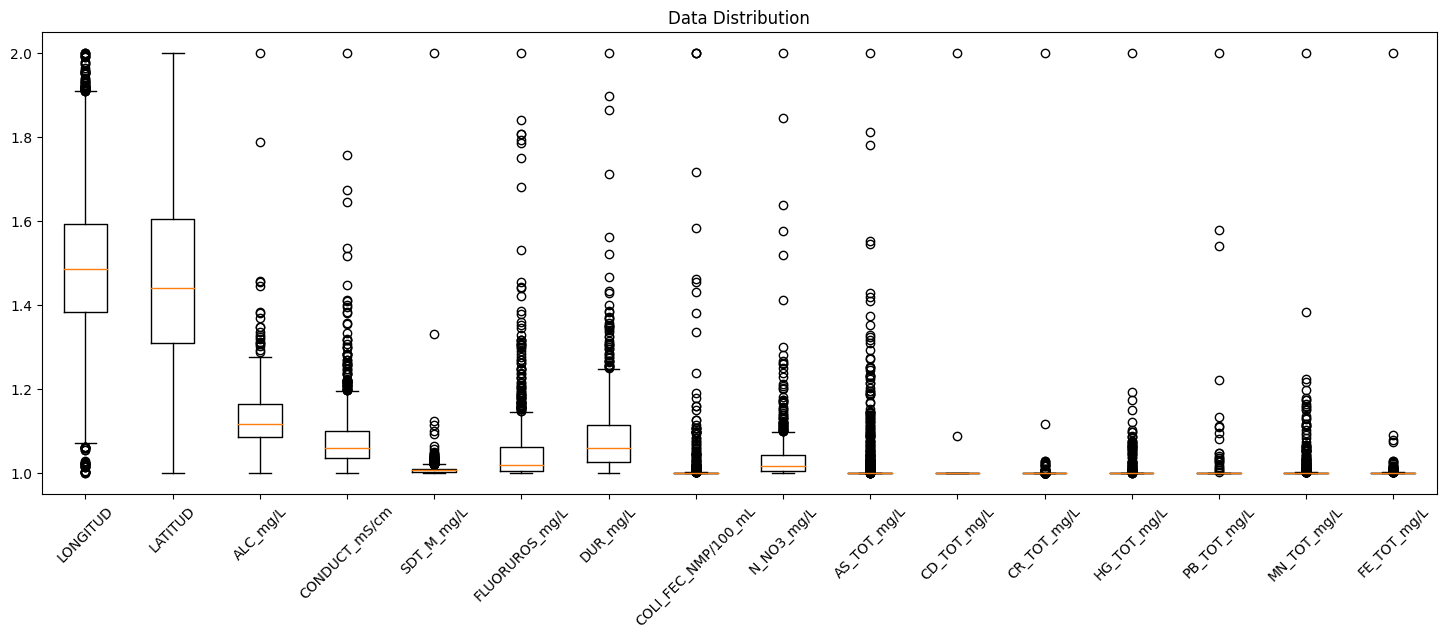

In [13]:
quantitative_dataset = XtrainvalTransf_asDataFrame[['LONGITUD','LATITUD', 'ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L',
'FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

plt.figure(figsize= (18, 6))
plt.boxplot(quantitative_dataset, labels=quantitative_dataset.columns)
plt.title("Data Distribution")
plt.xticks(rotation = 45);
plt.show()

In [14]:
XtrainvalTransf_asDataFrame = XtrainvalTransf_asDataFrame.apply(pd.to_numeric, errors='coerce')

    Buscando correlacion entre la calidad del agua (Semaforo) y su ubicacion geografica.

In [15]:
Bad_water_dataset = XtrainvalTransf_asDataFrame[['LONGITUD','LATITUD','OneHotEncoder__x18_Amarillo', 'OneHotEncoder__x18_Rojo', 'OneHotEncoder__x18_Verde']]

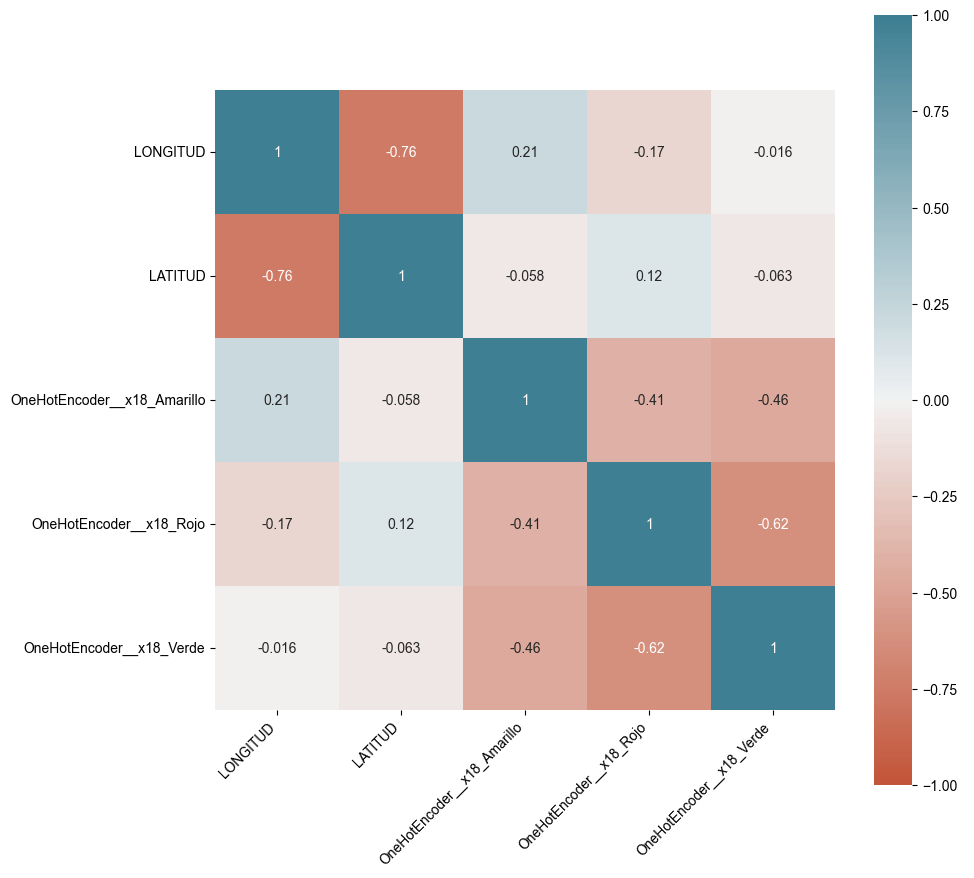

In [16]:
corr = Bad_water_dataset.corr()

fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(
    corr, annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
sns.set(font_scale=2.0) 
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

    Ahora buscaremos los Kmeans utilizando estas 5 caracteristicas:

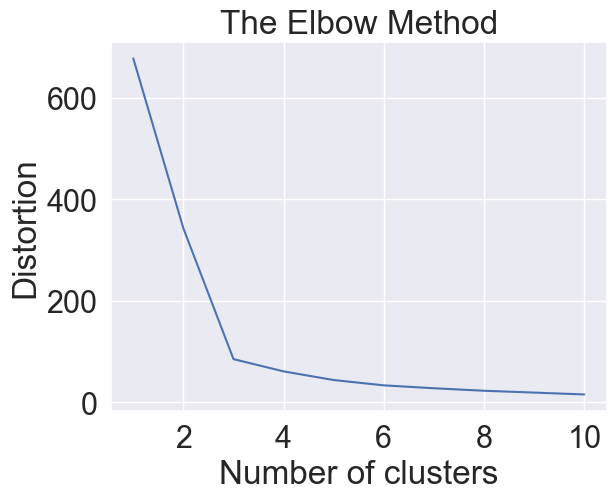

In [17]:
#tu codigo aquí
from sklearn import preprocessing, cluster

#Buscaremos los clusters dependiendo de su latitud y longitud combinada
X = Bad_water_dataset.copy()
max_k = 10## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
#ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
#ax.legend()
ax.grid(True)
plt.show();

3 son los clusters que se observan mediante el metodo del codo

In [18]:
latlong = df[['LATITUD','LONGITUD']]

In [19]:
#Busquemos cuales son los centroides de los clusters, esto sera el centroide de las relaciones encontradas entre latitud, longitud y los semaforos
k = 3

model = cluster.KMeans(n_clusters=k, init='k-means++')
X = latlong.copy() # Cluster
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X) ## Buscar los centroidees (Distancia mas corta a todas las tiendas a su alrededor)
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, dtf_X.drop("cluster", axis=1).values)
dtf_X["centroide"] = 0
for i in closest:
    dtf_X["centroide"].iloc[i] = 1
df[["cluster","centroide"]] = dtf_X[["cluster","centroide"]]

df.sample(5)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,cluster,centroide
279,DLEST917,POZO NUM. 37 OPERADO POR APAS METEPEC,LERMA SANTIAGO PACIFICO,MEXICO,METEPEC,VALLE DE TOLUCA,POZO,-99.61376,19.24489,2020,149.940,Media,284.0,Buena para riego,NaN,176,Excelente para riego,Potable - Dulce,0.3568,Baja,126.31,Potable - Dura,40,Buena calidad,2.2109,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0298,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,1,0
760,OCLSP3684,POZO JOSE CRUZ HERNANDEZ,LERMA SANTIAGO PACIFICO,JALISCO,TLAJOMULCO DE ZUIGA,TOLUQUILLA,POZO,-103.41161,20.56188,2020,140.970,Media,472.0,Buena para riego,NaN,462.3333,Excelente para riego,Potable - Dulce,1.0276,Potable - Optima,121.512,Potable - Dura,<1.1,Potable - Excelente,34.032118,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,1,0
689,OCCCN5284M1,POZO ADM,CUENCAS CENTRALES DEL NORTE,DURANGO,GOMEZ PALACIO,PRINCIPAL-REGION LAGUNERA,POZO,-103.48577,25.55517,2020,198.380,Alta,2830.0,Dudosa para riego,NaN,740,Cultivos sensibles,Potable - Dulce,0.6826,Media,337.314,Potable - Dura,41,Buena calidad,12.039454,No apta como FAAP,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.0212,Potable - Excelente,0.4356,Sin efectos en la salud - Puede dar color al agua,Rojo,"CONDUC,FE,NO3,",SI,NO,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,NO,1,0
558,DLZAC2616,MORELOS,CUENCAS CENTRALES DEL NORTE,ZACATECAS,MORELOS,CALERA,POZO,-102.64638,22.86370,2020,196.470,Alta,512.0,Buena para riego,NaN,405.6,Excelente para riego,Potable - Dulce,0.4236,Media,191.232,Potable - Dura,<1.1,Potable - Excelente,1.940551,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,0.0074,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,1,0
221,DLDUR711,POZO LA PARRILLA,PACIFICO NORTE,DURANGO,NOMBRE DE DIOS,VICENTE GUERRERO-POANAS,POZO,-104.08413,23.77516,2020,235.425,Alta,544.0,Buena para riego,NaN,330,Excelente para riego,Potable - Dulce,3.0407,Alta,113.6922,Potable - Moderadamente suave,1162,Contaminada,0.771932,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.0022,Potable - Excelente,0.1505,Potable - Excelente,Rojo,"FLUO,CF,",SI,SI,SI,SI,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI,1,0


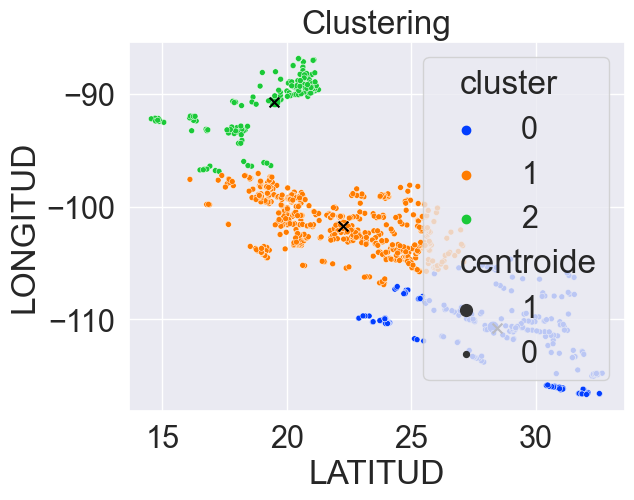

In [20]:
# Las X muestran los centroides (expresado en altitud y longitud)
fig, ax = plt.subplots()
rcParams['figure.figsize'] = 10,10
sns.scatterplot(x="LATITUD", y="LONGITUD", data=df, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroide", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering')
                
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', marker="x");

In [21]:
df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)
#Dataframe now has the Coordinates columns as a point, neccessary for map plotting
#df.head()

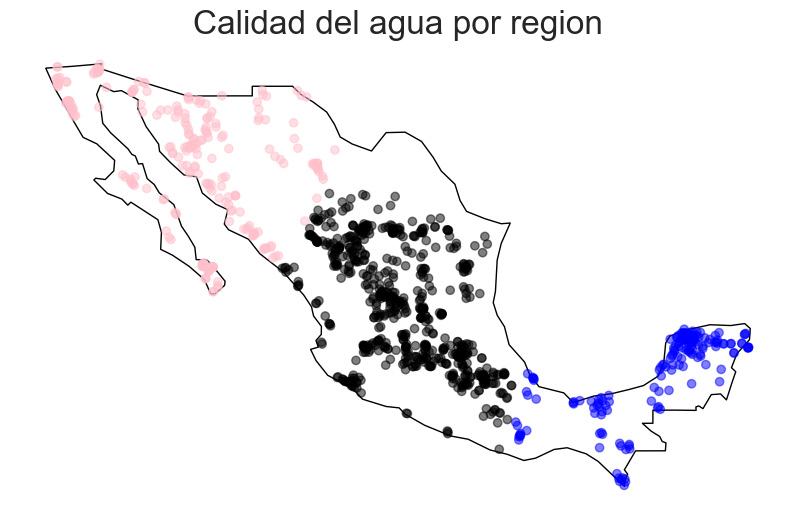

In [24]:
#Para graficarlos en un mapa

water_sectors = gpd.GeoDataFrame(df, geometry="Coordinates")
water_sectors.head()

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

color_mapping = {0.0: "pink", 1.0: "black", 2.0: "blue", 3.0: "yellow",4.0: "orange",5.0: "red"}
water_sectors.plot(ax=gax, alpha = 0.5, c=water_sectors["cluster"].map(color_mapping))

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Calidad del agua por region')

# Kill the spines...
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# ...or get rid of all the axis. Is it important to know the lat and long?
plt.axis('off')

# Label the dots
#for x, y, cluster_ in zip(water_sectors['Coordinates'].x, water_sectors['Coordinates'].y, water_sectors['CALIDAD_MN']):
#    gax.annotate(cluster_, xy=(x,y), xytext=(2,2), textcoords='offset points')
cursor(hover=True)
plt.show()

